<a href="https://colab.research.google.com/github/ginttone/multi_deeplearning/blob/master/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

## 차원이 있는 데이터 처리

데이터 셋 : tensorflow.keras.datasets.mnist

처음 이미지 사용 (손글씨를 이 방식으로 해결했다)

In [1]:
from tensorflow.keras.datasets.mnist import load_data

 이미지는 구성이 픽셀(점)으로 이루어져있다.

 mnist 흰색과 검은색으로 구성.(검은배경, 흰숫자)

 x_train (60000, 28, 28) 은 (행, 열, 깊이)

 y_train (60000,) 해당부분의 y의 값

In [2]:
(x_train, y_train),(x_test, y_test) = load_data(path='mnist.npz')

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

x_train 숫자 라는 것을 보여주기위한 작업( 4 번째 해당부분의 이미지)

In [3]:
y_train[4], x_train[4]  

(9, array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         

In [4]:
y_train[50000], x_train[50000]

(3, array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  47, 160, 195,
         205,  71,  86,  13,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  12, 238, 254, 254,
         254, 254, 254, 227,  84,   0,   0,   0,   0,   0,   0,   0,   0,
         

In [5]:
import matplotlib.pyplot as plt

9


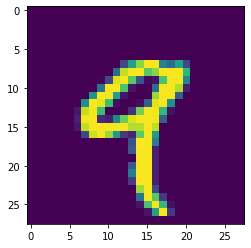

In [6]:
plt.imshow(x_train[4])
print(y_train[4])

3 <class 'numpy.uint8'>


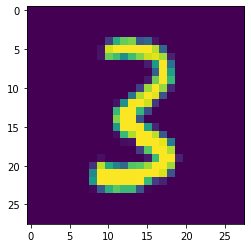

In [7]:
plt.imshow(x_train[50000])
print(y_train[50000], type(y_train[50000]))

첫번째 단계 : 3차원(이미지 2차원데이터)를 2차원(이미지 1차원데이터)로 만든다 

라쉐입에서 -1 은 한쪽 영역이 완료되면 나머지도 해준다라는 뜻

x_train 과 x_test 를 255로 나눠주어야 한다

`->` 0~255 은 색상을 숫자로 표현한 것이어서 나눠주어야함(색분포표)

In [8]:
x_train = x_train.reshape(-1,28*28)/255
x_train.shape

(60000, 784)

784 화소로 표현

In [9]:
x_test = x_test.reshape(-1,28*28)/255
x_test.shape

(10000, 784)

In [10]:
y_train[2:10], y_train.shape 

(array([4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8), (60000,))

y_train의 유니크값을 확인해서 모델에서 아웃풋 dense에 10을 넣어줌을 확인

In [11]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## 교육단계 Classification

y_train이 분류형 [4, 1, 9, 2, 1, 3, 1, 4]

### 모델 model

In [12]:
import tensorflow as tf

In [13]:
model = tf.keras.models.Sequential()

In [14]:
model.add(tf.keras.Input(shape=(784))) 

In [15]:
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))

*  output layer 의 activation 공식

  unique가 3개 이상 일때는 activation은 softmax를 쓴다

  긍정과 부정 처럼 분류가 2개일(2진) 경우는 binary 라고 하는데 이때는 activation을 sigmoid를 쓴다

In [16]:
model.add(tf.keras.layers.Dense(10,activation='softmax')) 

* [loss율 공식](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

연속형의 측정값 mae(절대값)

```
loss = mean(abs(y_true - y_pred), axis=-1)
```

regression 일때는 mse (오차값)

```
loss = mean(square(y_true - y_pred), axis=-1)
```

classification 일때는 categorical_crossentropy

(activation = softmax)

```
tf.keras.metrics.categorical_crossentropy(
    y_true, y_pred, from_logits=False, label_smoothing=0
)
```

sparse_categorical_crossentropy

원핫인코딩 하기 싫을 때 사용

```
tf.keras.metrics.sparse_categorical_crossentropy(
    y_true, y_pred, from_logits=False, axis=-1
)
```

binary_crossentropy

(activation = sigmoid)

```
tf.keras.metrics.binary_crossentropy(
    y_true, y_pred, from_logits=False, label_smoothing=0
)
```

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

* optimizer 

### 트레이닝

In [18]:
hist = model.fit(x_train,y_train, epochs=100, validation_split=0.3)

Epoch 1/100
1313/1313 [==============================] - 4s 2ms/step - loss: 0.3278 - acc: 0.9061 - val_loss: 0.1876 - val_acc: 0.9433
Epoch 2/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1480 - acc: 0.9554 - val_loss: 0.1429 - val_acc: 0.9588
Epoch 3/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1045 - acc: 0.9692 - val_loss: 0.1309 - val_acc: 0.9601
Epoch 4/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0811 - acc: 0.9744 - val_loss: 0.1270 - val_acc: 0.9619
Epoch 5/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0661 - acc: 0.9801 - val_loss: 0.1205 - val_acc: 0.9654
Epoch 6/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0525 - acc: 0.9834 - val_loss: 0.1175 - val_acc: 0.9663
Epoch 7/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0456 - acc: 0.9853 - val_loss: 0.1089 - val_acc: 0.9696
Epoch 8/100
1313/1313 [==============================] 

### 검증 Evaluation

In [19]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

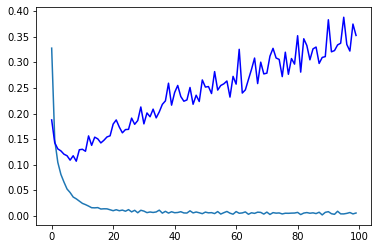

In [20]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'],'b-')
plt.show()

어큐런시 변화체크

(가로가 epochs) 

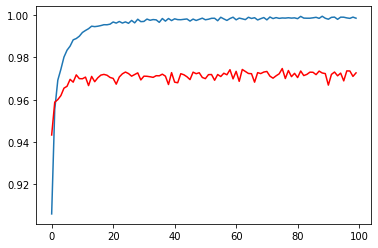

In [21]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'],'r-')
plt.show()

## 서비스단계

바이너리 아닌 방식들은 해당부분을 이런식으로 확인해줘야 한다

In [22]:
import numpy as np
np.set_printoptions(precision=8)

In [36]:
pred = model.predict(x_test[30:31])
pred, np.argmax(pred)

(array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
         0.0000000e+00, 7.4884369e-28, 0.0000000e+00, 8.1782451e-32,
         0.0000000e+00, 1.2105848e-25]], dtype=float32), 3)

pred에 argmax 사용

In [24]:
np.argmax(pred, axis=1)

array([3])

In [25]:
y_test[30]

3

[argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html)

전체 배열 중 가장 큰 값을 선택하고 그 큰 값의 배열의 위치값을 가져옴

```
a = np.arange(6).reshape(2,3) + 10

np.argmax(a)
```


In [26]:
a = np.arange(6).reshape(2,3) + 10

print(a)

[[10 11 12]
 [13 14 15]]


In [27]:
np.argmax(a)

5

argmax option

행(option)중에서 원하는 가장 큰 위치값을 가져옴

```
a = np.arange(6).reshape(2,3) + 10
print(a)
np.argmax(a, axis=1)
```

In [28]:
a = np.arange(6).reshape(2,3) + 10
print(a)
np.argmax(a, axis=1)

[[10 11 12]
 [13 14 15]]


array([2, 2])

argmax option

컬럼(option)중에서 원하는 가장 큰 위치값을 가져옴

```
a = np.arange(6).reshape(2,3) + 10
print(a)
np.argmax(a, axis=0)
```

In [29]:
a = np.arange(6).reshape(2,3) + 10
print(a)
np.argmax(a, axis=0)

[[10 11 12]
 [13 14 15]]


array([1, 1, 1])

In [30]:
np.argmax(np.array([[10,11,12]]), axis=1)

array([2])

## 저장 및 불러오기


### 저장 save

Sequential save 첫번째 방법

폴더로 해서 여러가지 생긴 것

In [31]:
model.save('./model_save')

INFO:tensorflow:Assets written to: ./model_save/assets


save 두번째 방법

파일 하나로 만든 것

In [32]:
model.save('./model_save01.h5')

### 불러오기 load 

In [33]:
model_load = tf.keras.models.load_model('./model_save01.h5')

In [34]:
model_load

로드해온 값이 위 pred , pred.np.argmax(pred) 가 같은지 비교해준다(더블첵)

위 pred , pred.np.argmax(pred) 결과
```
(array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
         0.0000000e+00, 7.4884369e-28, 0.0000000e+00, 8.1782451e-32,
         0.0000000e+00, 1.2105848e-25]], dtype=float32), 3)
```

In [37]:
load_pred = model_load.predict(x_test[30:31])
load_pred, np.argmax(load_pred)

(array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
         0.0000000e+00, 7.4884369e-28, 0.0000000e+00, 8.1782451e-32,
         0.0000000e+00, 1.2105848e-25]], dtype=float32), 3)